# TEAM NAME: garichy
# Kaggle score: 0.84704

# Первая часть. Исследование

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных

1) Работа с пропущенными и дублирующимимся значениями

In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'
pie_col = cat_cols + [target_col]

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

In [ ]:
total = train.isna().sum().sort_values(ascending = False)
percent = round(train.isna().sum().sort_values(ascending = False)/len(train)*100,2)
pd.concat([total, percent], axis=1, keys=['Total','Percent'])

,Total,Percent
ClientPeriod,0,0.0
MonthlySpending,0,0.0
PaymentMethod,0,0.0
IsBillingPaperless,0,0.0
HasContractPhone,0,0.0
HasMovieSubscription,0,0.0
HasOnlineTV,0,0.0
HasTechSupportAccess,0,0.0
HasDeviceProtection,0,0.0
HasOnlineBackup,0,0.0


In [ ]:
train.sort_values("TotalSpent").head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
3343,5,24.30,100.2,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,0


In [ ]:
train["TotalSpent"].replace(to_replace=" ", value='0', inplace= True)
train["TotalSpent"] = train.TotalSpent.astype(float)

test["TotalSpent"].replace(to_replace=" ", value='0', inplace= True)
test["TotalSpent"] = test.TotalSpent.astype(float)

len(train[train["TotalSpent"] == ' '])

0

In [ ]:
y_train, X_train = train['Churn'], train.iloc[:,:-1]
X_train.head()

In [ ]:
print(f"Duplicated rows: {train.duplicated(keep=False).sum()}")
print(f"Duplicated rows without target: {train.drop('Churn', axis=1).duplicated(keep=False).sum()}")

Duplicated rows: 28
Duplicated rows without target: 41


In [ ]:
train.iloc[:,:-1].drop_duplicates(inplace=True);
train.drop(index=train[train.drop(target_col, axis=1).duplicated(keep=False)].index, inplace=True)

In [ ]:
print(f"Duplicated rows: {train.duplicated(keep=False).sum()}")
print(f"Duplicated rows without target: {train.drop('Churn', axis=1).duplicated(keep=False).sum()}")

Duplicated rows: 0
Duplicated rows without target: 0


In [ ]:
numeric_data = train[num_cols]
y_train, X_train = train['Churn'], train[feature_cols]
categorial_data = train[cat_cols]

## Анализ данных

1) Построение гистограмм для численных призанков. Для категориальных подосчёт количества каждого значения для каждого признака.

2) Определение, являются ли классы несбалансированными.

---

*1) Построение гистограмм для численных призанков. Для категориальных подосчёт количества каждого значения для каждого признака.*

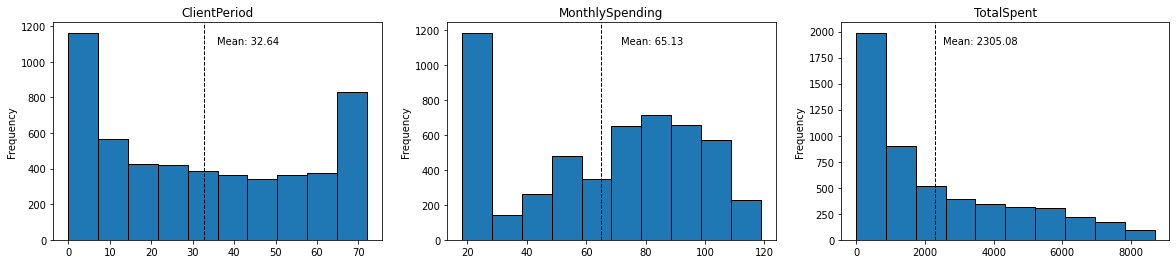

In [ ]:
fig, ax = plt.subplots(figsize=(20, 4), ncols=3)
for i in range(3):
    ax[i].set_title(num_cols[i])
    train[num_cols[i]].plot(kind="hist", ec="black", ax=ax[i])
    ax[i].axvline(numeric_data[num_cols[i]].mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = ax[i].get_ylim()
    ax[i].text(numeric_data[num_cols[i]].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(numeric_data[num_cols[i]].mean()))

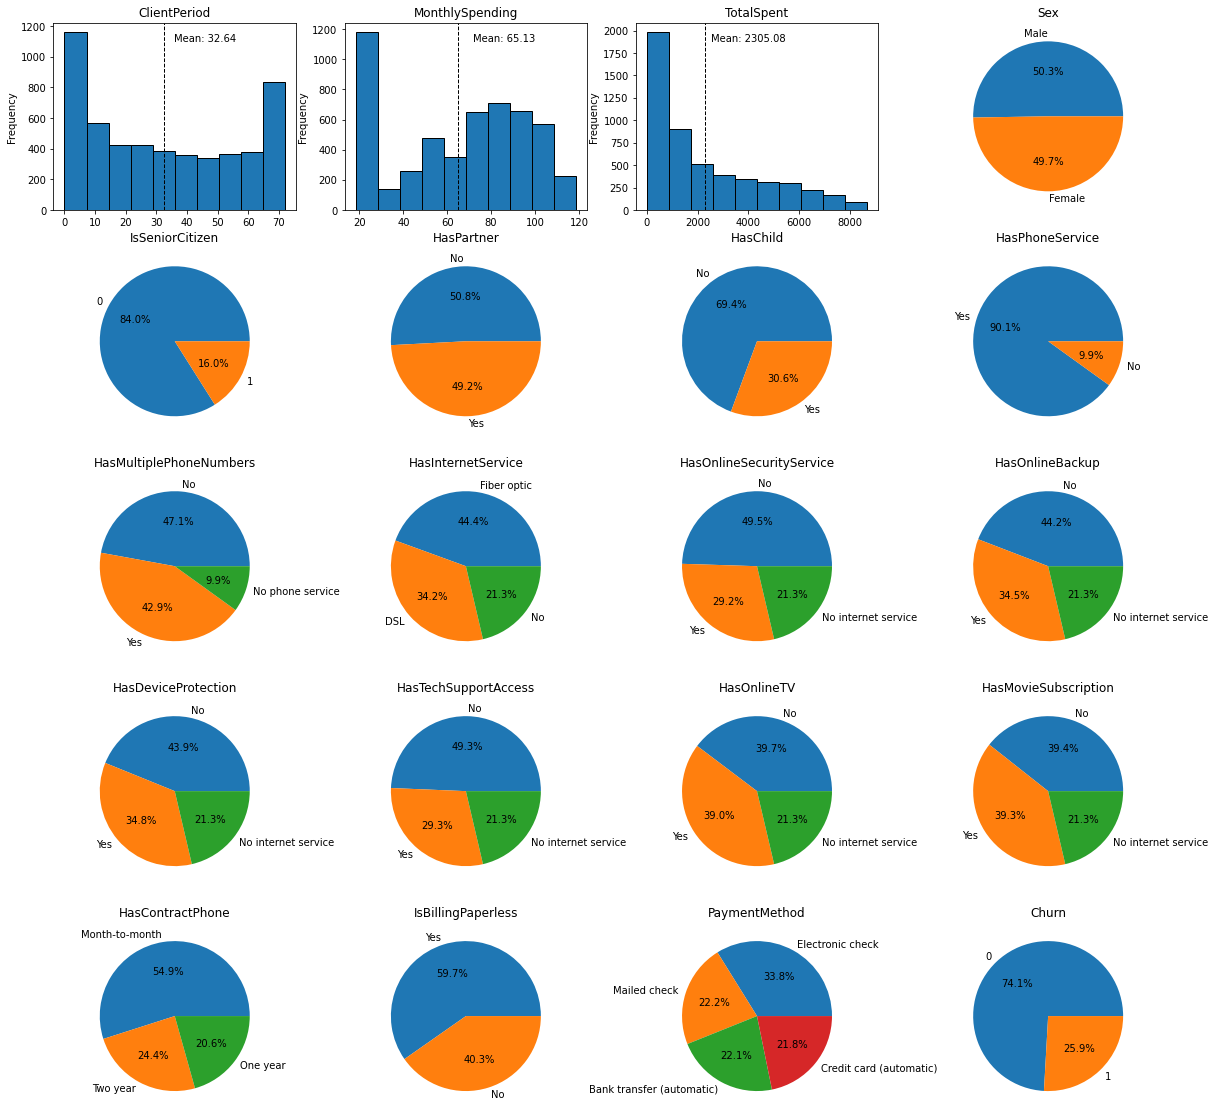

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
for ax, col in zip(axes.flatten(), train.columns):
    ax.set_title(col)
    if col in cat_cols or col == target_col:
        ax.pie(train[col].value_counts(), autopct="%1.1f%%", labels=train[col].value_counts().index)
    else:
        train[col].plot(kind="hist", ec="black", ax=ax)
        ax.axvline(train[col].mean(), color='k', linestyle='dashed', linewidth=1)
        min_ylim, max_ylim = ax.get_ylim()
        ax.text(train[col].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(train[col].mean()))

## Применение линейных моделей

1) Обработка данных для того, чтобы к ним можно было применить LogisticRegression (нормирование числовых признаков и кодирование категориальных)

2) Тестирование гипперпараметров с помощью кроссвалидации по метрике ROC-AUC.

3) Создание единного Pipeline для преобразования данных и LogisticRegression

---

*1) Обработка данных*

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [ ]:
scaler = StandardScaler()

num_scaled_train = scaler.fit_transform(train[num_cols])
num_scaled_test = scaler.transform(test[num_cols])

In [ ]:
Norm_cod_train = pd.concat([pd.DataFrame(columns=num_cols, data=num_scaled_train), pd.get_dummies(train[cat_cols]).reset_index(drop=True)], axis=1)
Norm_cod_test = pd.concat([pd.DataFrame(columns=num_cols, data=num_scaled_test), pd.get_dummies(test[cat_cols]).reset_index(drop=True)], axis=1)
Norm_cod_train.head(2)

In [ ]:
X_train_spl, X_test_spl, y_train_spl, y_test_spl = train_test_split(Norm_cod_train, y_train, test_size=0.2)

In [ ]:
X_train_spl.head(2)

In [ ]:
LR = LogisticRegression()
params = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag']}
CV_model = GridSearchCV(estimator=LR, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1, verbose=10, refit=True)
CV_model.fit(X_train_spl , y_train_spl)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='roc_auc', verbose=10)

In [ ]:
CV_model.best_estimator_

LogisticRegression(C=10, solver='sag')

In [ ]:
CV_model.best_score_

0.8407494171841254

In [ ]:
roc_auc_score(y_test_spl, CV_model.best_estimator_.predict_proba(X_test_spl)[:, 1])

0.8560174162152933

*2) Тестирование гипперпараметров с помощью кроссвалидации по метрике ROC-AUC.*

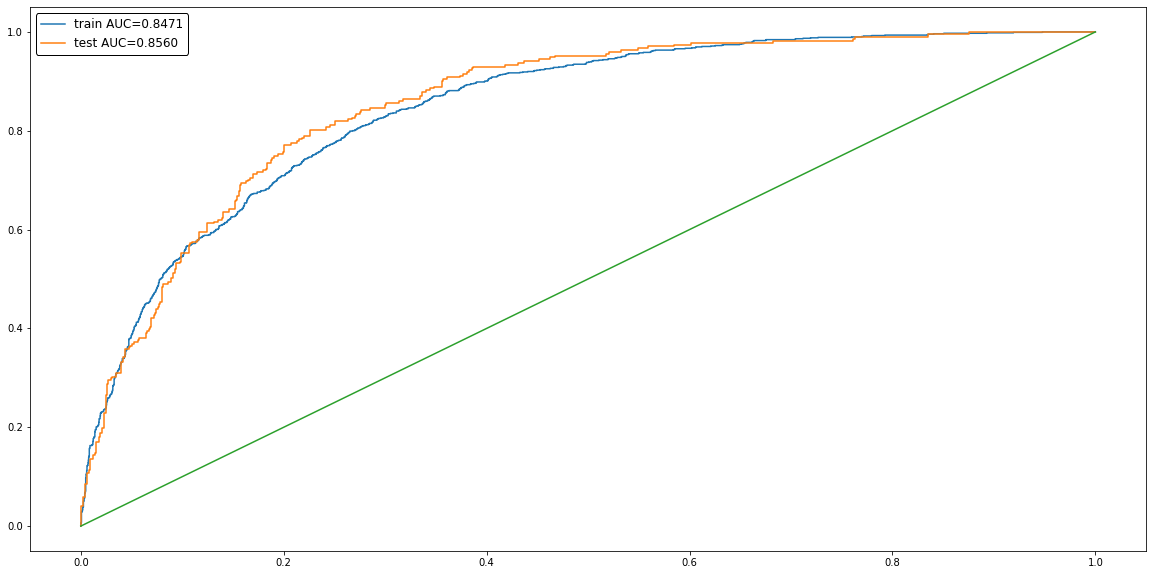

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_train_predicted = CV_model.best_estimator_.predict_proba(X_train_spl)[:, 1]
y_test_predicted = CV_model.best_estimator_.predict_proba(X_test_spl)[:, 1]

train_auc = roc_auc_score(y_train_spl, y_train_predicted)
test_auc = roc_auc_score(y_test_spl, y_test_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train_spl, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test_spl, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

*3) Создание единного Pipeline для преобразования данных и LogisticRegression*

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# pipeline way
y_train_P = y_train.reset_index(drop=True)
X_train_P = train.drop(target_col, axis=1)

prep_pipeline = ColumnTransformer([
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(sparse=False), cat_cols)
    ])

cls = make_pipeline(
    prep_pipeline,
    LogisticRegression(random_state=42, solver="saga", max_iter=10000)
    )

param_grid = {
    'logisticregression__penalty' : ['l1', 'l2', 'elasticnet', None],
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__class_weight': ['balanced', None]
}

model = GridSearchCV(cls, param_grid, cv=5, verbose=0, scoring='roc_auc', refit=True, n_jobs=-1)
model.fit(X_train_P, y_train_P)

print("Best ROC-AUC metric:", round(model.best_score_,4))
print("Best estimator's parameters:", model.best_params_)

Best ROC-AUC metric: 0.8455
Best estimator's parameters: {'logisticregression__C': 100, 'logisticregression__class_weight': None, 'logisticregression__penalty': 'l2'}


## Применение градиентного бустинга
1) Разделение выборки на train/valid. Использование catboost cо стандартными параметрами.

2) Тестирование разных занчений параметров количества деревьев и learning_rate'а по метрике ROC-AUC комбинацию.

---

*1) Разделение выборки на train/valid. Использование catboost cо стандартными параметрами.*

In [ ]:
import xgboost

boosting_model = xgboost.XGBClassifier(n_estimators=500)

boosting_model.fit(X_train_spl, y_train_spl)

y_train_predicted_boost = boosting_model.predict_proba(X_train_spl)[:, 1]
y_test_predicted_boost = boosting_model.predict_proba(X_test_spl)[:, 1]

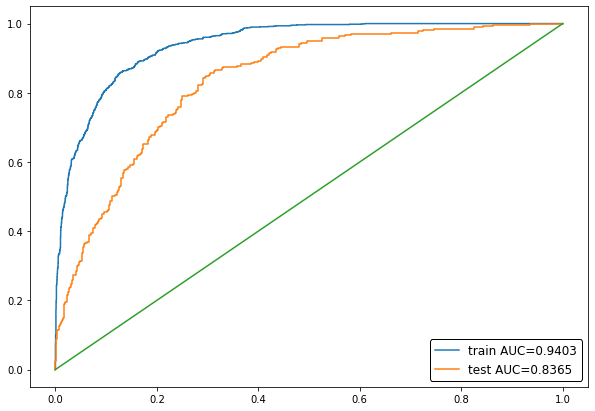

In [ ]:
train_auc_boost = roc_auc_score(y_train_spl, y_train_predicted_boost)
test_auc_boost = roc_auc_score(y_test_spl, y_test_predicted_boost)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_spl, y_train_predicted_boost)[:2], label='train AUC={:.4f}'.format(train_auc_boost))
plt.plot(*roc_curve(y_test_spl, y_test_predicted_boost)[:2], label='test AUC={:.4f}'.format(test_auc_boost))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [ ]:
# for colab
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
import catboost

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(train.iloc[:,:-1], y_train,
                                                       train_size=0.8,
                                                       random_state=42)

catb_model = catboost.CatBoostClassifier(n_estimators=200, l2_leaf_reg=4.25,
                                                     learning_rate=0.05, max_depth=3, cat_features=cat_cols)

catb_model.fit(X_train_orig, y_train_orig, eval_set=(X_test_orig, y_test_orig), cat_features=cat_cols)

y_train_predicted_catb = catb_model.predict_proba(X_train_orig)[:, 1]
y_test_predicted_catb = catb_model.predict_proba(X_test_orig)[:, 1]

190:	learn: 0.3913265	test: 0.4302134	best: 0.4300969 (181)	total: 1.45s	remaining: 68.3ms
191:	learn: 0.3911401	test: 0.4302918	best: 0.4300969 (181)	total: 1.46s	remaining: 60.9ms
192:	learn: 0.3909628	test: 0.4304021	best: 0.4300969 (181)	total: 1.47s	remaining: 53.3ms
193:	learn: 0.3907599	test: 0.4303684	best: 0.4300969 (181)	total: 1.48s	remaining: 45.6ms
194:	learn: 0.3905898	test: 0.4304493	best: 0.4300969 (181)	total: 1.48s	remaining: 38ms
195:	learn: 0.3904020	test: 0.4304544	best: 0.4300969 (181)	total: 1.49s	remaining: 30.4ms
196:	learn: 0.3902837	test: 0.4303662	best: 0.4300969 (181)	total: 1.5s	remaining: 22.8ms
197:	learn: 0.3902818	test: 0.4303660	best: 0.4300969 (181)	total: 1.5s	remaining: 15.2ms
198:	learn: 0.3902535	test: 0.4303559	best: 0.4300969 (181)	total: 1.51s	remaining: 7.6ms
199:	learn: 0.3901005	test: 0.4304459	best: 0.4300969 (181)	total: 1.52s	remaining: 0us

bestTest = 0.430096885
bestIteration = 181

Shrink model to first 182 iterations.


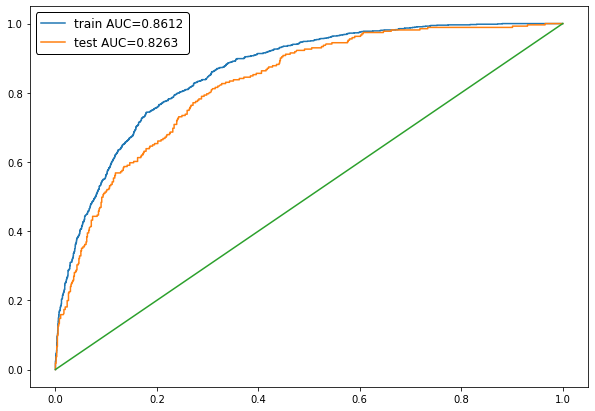

In [ ]:
train_auc_catb = roc_auc_score(y_train_orig, y_train_predicted_catb)
test_auc_catb = roc_auc_score(y_test_orig, y_test_predicted_catb)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train_orig, y_train_predicted_catb)[:2], label='train AUC={:.4f}'.format(train_auc_catb))
plt.plot(*roc_curve(y_test_orig, y_test_predicted_catb)[:2], label='test AUC={:.4f}'.format(test_auc_catb))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

*2) Тестирование разных занчений параметров количества деревьев и learning_rate'а по метрике ROC-AUC комбинацию.*

In [ ]:
X_train_Cat = train.iloc[:,:-1].reset_index(drop=True)

In [ ]:
import catboost

catboostCV = catboost.CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=0,
)

PARAMS = {
    "n_estimators": [350],  # [200, 250, 300, 350, 450, 500, 600, 800, 1000],
    "learning_rate": [0.05],  # [0.02, 0.04, 0.05, 0.1, 0.2],
    "max_depth": [4],  # [3, 4, 5, 7],
    "l2_leaf_reg": [10],  #[0.1, 1, 10, 20]
    "subsample": [0.6],  # [0.1, 0.6, 3, 6],
    "random_strength": [5],
    "min_data_in_leaf": [100],  # [10, 100, 200],
}
catboostCV.grid_search(PARAMS, X_train_Cat, y_train, cv=5, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8304217	best: 0.8304217 (0)	total: 3.1s	remaining: 0us
Estimating final quality...


{'params': {'min_data_in_leaf': 100,
  'random_strength': 5,
  'depth': 4,
  'l2_leaf_reg': 10,
  'iterations': 350,
  'subsample': 0.6,
  'learning_rate': 0.05},
 'cv_results': defaultdict(list,
             {'iterations': [0, 349],
              'test-AUC-mean': [0.7139147520492499, 0.8452519719037612],
              'test-AUC-std': [0.02978636167278093, 0.015591208160048541],
              'train-AUC-mean': [0.7168272429407592, 0.8697371901005024],
              'train-AUC-std': [0.01571427481658645, 0.003327104445536362],
              'test-Logloss-mean': [0.6709925226226682, 0.41184011625371486],
              'test-Logloss-std': [0.000728734118555166, 0.01640471444494244],
              'train-Logloss-mean': [0.671045033490308, 0.3831591732797396],
              'train-Logloss-std': [0.0005646962151300327,
               0.0038277259973199525]})}

In [ ]:
print("Best score:", end=' ')
print(catboostCV.best_score_)
best_params = catboostCV.get_params()
for f in ("cat_features", "logging_level", "eval_metric"):
    best_params.pop(f)
print("Best params:", end=' ')
print(best_params)

Best score: {'learn': {'Logloss': 0.3846678794845523, 'AUC': 0.8681877619726679}}
Best params: {'random_seed': 0, 'metric_period': 1000, 'grow_policy': 'Lossguide', 'min_data_in_leaf': 100, 'random_strength': 5, 'depth': 4, 'l2_leaf_reg': 10, 'iterations': 350, 'subsample': 0.6, 'learning_rate': 0.05}


# Предсказания

In [ ]:
best_model = catboost.CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=1000,
    random_seed=0,
)

PARAMS = {
    "n_estimators": [350],
    "learning_rate": [0.05],
    "max_depth": [4],
    "l2_leaf_reg": [10],
    "subsample": [0.6],
    "random_strength": [5],
    "min_data_in_leaf": [100],
}

X_train_sC, X_test_sC, y_train_sC, y_test_sC = train_test_split(X_train_Cat, y_train,
                                                       train_size=0.8,
                                                       random_state=42)

best_model.fit(X_train_Cat, y_train)

In [ ]:
X_test = pd.read_csv('test.csv')

In [ ]:
submission = pd.read_csv('submission.csv')

In [ ]:
X_test.sort_values("TotalSpent").head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1504,1,100.80,100.8,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check


In [ ]:
X_test["TotalSpent"].replace(to_replace=" ", value='0', inplace= True)
X_test["TotalSpent"] = test.TotalSpent.astype(float)
X_test.sort_values("TotalSpent").head(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
177,0,19.85,0.00,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
767,0,20.25,0.00,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1366,1,18.85,18.85,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check


In [ ]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission['Churn'].head()

0    0.049384
1    0.631179
2    0.553485
3    0.023643
4    0.002920
Name: Churn, dtype: float64

In [ ]:
submission.to_csv('my_submission.csv', index=False)